In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout,MaxPooling2D,Flatten,Activation

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path="C:\\Users\Atul\\Desktop\\Junk\\Dataset"

In [6]:
train_path=path+"\\train"
test_path=path+"\\test"

In [7]:
dim1=[]
dim2=[]

for img in os.listdir(train_path+"\\blurred\\"):
    d1,d2,col=(plt.imread(train_path+"\\blurred\\"+img)).shape
    dim1.append(d1)
    dim2.append(d2)

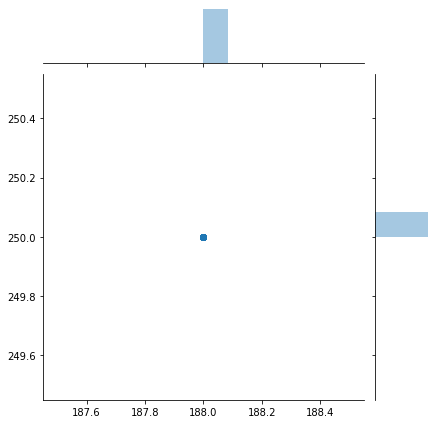

In [8]:
sns.jointplot(dim1,dim2)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
gen=ImageDataGenerator(rotation_range=20,shear_range=0.2,width_shift_range=0.1,height_shift_range=0.1,
                      rescale=1/255, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

In [9]:
gen.flow_from_directory(train_path)

Found 255 images belonging to 2 classes.


In [36]:
model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(250,188,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 248, 186, 256)     7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 46, 256)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 730112)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               93454464  
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
_________________________________________________________________
activation_11 (Activation)   (None, 1)                

In [38]:
train_gen=gen.flow_from_directory(train_path,target_size=(250,188),class_mode='binary',color_mode='rgb',batch_size=20,
                                 shuffle=True)

Found 255 images belonging to 2 classes.


In [39]:
test_gen=gen.flow_from_directory(test_path,target_size=(250,188),class_mode='binary',color_mode='rgb',batch_size=5,
                                 shuffle=False)

Found 48 images belonging to 2 classes.


In [40]:
model.fit_generator(train_gen,epochs=15,validation_data=test_gen)

Epoch 1/15
13/13 [==============================] - 65s 5s/step - loss: 4.7460 - accuracy: 0.6314 - val_loss: 0.7273 - val_accuracy: 0.7500
Epoch 2/15
13/13 [==============================] - 48s 4s/step - loss: 0.4497 - accuracy: 0.7882 - val_loss: 0.7590 - val_accuracy: 0.6667
Epoch 3/15
13/13 [==============================] - 44s 3s/step - loss: 0.4251 - accuracy: 0.7804 - val_loss: 0.6271 - val_accuracy: 0.7292
Epoch 4/15
13/13 [==============================] - 52s 4s/step - loss: 0.4328 - accuracy: 0.8039 - val_loss: 0.7418 - val_accuracy: 0.7292
Epoch 5/15
13/13 [==============================] - 49s 4s/step - loss: 0.3409 - accuracy: 0.8667 - val_loss: 0.7423 - val_accuracy: 0.7500
Epoch 6/15
13/13 [==============================] - 42s 3s/step - loss: 0.3572 - accuracy: 0.8275 - val_loss: 0.6025 - val_accuracy: 0.7708
Epoch 7/15
13/13 [==============================] - 42s 3s/step - loss: 0.3976 - accuracy: 0.8549 - val_loss: 0.6995 - val_accuracy: 0.7292
Epoch 8/15
13/13 [==

In [33]:
model.evaluate_generator(test_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.9855925440788269, 0.75]